In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 One-Hot Encoding (OHE)

## 📖 What is One-Hot Encoding?
One-Hot Encoding is a technique used to **convert categorical variables into numerical representations**, making them suitable for machine learning models. It ensures that categorical data can be effectively used without introducing ordinal relationships.

---

## 🛠 How It Works:
- Each **unique category** in a column is represented as a **binary vector**.
- A separate **binary column** is created for each category.
- The presence of a category is marked as `1`, while all others remain `0`.

---

## 🔥 Example:
Suppose we have a categorical column **"Color"** with values:  
`Red`, `Blue`, `Green`.

One-Hot Encoding will transform it as:

| Color  | Red | Blue | Green |
|--------|-----|------|-------|
| Red    |  1  |  0   |  0    |
| Blue   |  0  |  1   |  0    |
| Green  |  0  |  0   |  1    |

---

## ✅ When to Use:
✔ When categorical data is **nominal (unordered categories)**.  
✔ When models **cannot directly process categorical features**.  
✔ To **prevent numerical misinterpretation** of categorical values.

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [ ]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
categorical_cols=['sex' , 'class' , 'alive' , 'embarked'] # all the categorical colums in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.dropna(subset=categorical_cols)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
encoder=OneHotEncoder(sparse_output=False )
encoded_data=encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_data
# the data has been encoded to  0 and 1s

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())


DataFrame after One-Hot Encoding:
   survived  pclass   age  sibsp  parch     fare    who  adult_male deck  \
0         0       3  22.0      1      0   7.2500    man        True  NaN   
1         1       1  38.0      1      0  71.2833  woman       False    C   
2         1       3  26.0      0      0   7.9250  woman       False  NaN   
3         1       1  35.0      1      0  53.1000  woman       False    C   
4         0       3  35.0      0      0   8.0500    man        True  NaN   

   embark_town  ...  sex_male  class_First  class_Second  class_Third  \
0  Southampton  ...       1.0          0.0           0.0          1.0   
1    Cherbourg  ...       0.0          1.0           0.0          0.0   
2  Southampton  ...       0.0          0.0           0.0          1.0   
3  Southampton  ...       0.0          1.0           0.0          0.0   
4  Southampton  ...       1.0          0.0           0.0          1.0   

   alive_no  alive_yes  embarked_C  embarked_Q  embarked_S  embarked_

### One-Hot Encoding in the Titanic Dataset
The original embarked column in the Titanic dataset contained three unique categories:

'C' (Cherbourg) ,
'Q' (Queenstown) ,
'S' (Southampton)
When we apply one-hot encoding, this categorical column is transformed into multiple binary columns, each representing a unique category.


Thus, the new columns are:

embarked_C(1 if the passenger embarked from Cherbourg, 0 otherwise).
embarked_Q (1 if the passenger embarked from Queenstown, 0 otherwise).
embarked_S (1 if the passenger embarked from Southampton, 0 otherwise).
If both embarked_Q and embarked_S are 0, it means the passenger embarked from Cherbourg (C), since this category was dropped during encoding.



In [ ]:
df_encoded.info()
# as we can see after the encoding the data columns have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   age           714 non-null    float64 
 3   sibsp         891 non-null    int64   
 4   parch         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   who           891 non-null    object  
 7   adult_male    891 non-null    bool    
 8   deck          203 non-null    category
 9   embark_town   889 non-null    object  
 10  alone         891 non-null    bool    
 11  sex_female    891 non-null    float64 
 12  sex_male      891 non-null    float64 
 13  class_First   891 non-null    float64 
 14  class_Second  891 non-null    float64 
 15  class_Third   891 non-null    float64 
 16  alive_no      891 non-null    float64 
 17  alive_yes     891 non-null    float64 
 18  embarked_C

#Feature Scaling
##Techniques

*  Min-Max
*  Z-Score
*  Decimal Scaling
*   Log Transformation

## Why Normalize Data?
Normalization is essential in machine learning to ensure:
- **Faster convergence** during training.
- **Improved model performance** by standardizing feature scales.
- **Fair comparisons** when features have different units.

---




#Min-Max Scaling
### -used to scale data in any range[a,b]
## Why is it used?


*  to represent large data in a small range
* it still maintains the the original patterns in data

FORMULA

---


Scaled data=((data_old-old_min)/(max_old-old_min))*[a-b] + a




In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

In [28]:
house_data=pd.DataFrame(fetch_california_housing().data , columns=fetch_california_housing().feature_names)
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
columns = ["MedInc", "HouseAge", "AveRooms"]
data = house_data[columns].copy()
data.head()

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


In [ ]:
minmax_scaler = MinMaxScaler(feature_range=(2, 5))#feature range is the [a , b] range
data["MedInc_minmax"] = minmax_scaler.fit_transform(data[["MedInc"]])
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax
0,8.3252,41.0,6.984127,3.619005
1,8.3014,21.0,6.238137,3.614081
2,7.2574,52.0,8.288136,3.398084
3,5.6431,52.0,5.817352,3.064096
4,3.8462,52.0,6.281853,2.692328


#Z-Score Normalization
###What is Z-Score Normalization?
Z-Score Normalization (also called standardization) is a technique used to scale numerical data by transforming it into a distribution with a mean of 0 and a standard deviation of 1. This makes the data unitless and comparable across different scales.

### Formula
  Scaled data=(datapt_old-mean_old)/standard deviation(old)

In [30]:
from sklearn.preprocessing import StandardScaler
zscore_scaler = StandardScaler()
data["MedInc_zscore"] = zscore_scaler.fit_transform(data[["MedInc"]])
data.head()

,MedInc,HouseAge,AveRooms,MedInc_zscore
0,8.3252,41.0,6.984127,2.344766
1,8.3014,21.0,6.238137,2.332238
2,7.2574,52.0,8.288136,1.782699
3,5.6431,52.0,5.817352,0.932968
4,3.8462,52.0,6.281853,-0.012881


# Decimal Scaling
###What is Decimal Scaling?
Decimal Scaling is a normalization technique that transforms data by dividing each value by a power of 10, making sure that all values lie within a specific range. This technique is useful when dealing with large numerical values.

In [ ]:
max_abs = data["MedInc"].abs().max()
scaling_factor = 10 ** len(str(int(max_abs)))
data["MedInc_decimal"] = data["MedInc"] / scaling_factor
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore,MedInc_decimal
0,8.3252,41.0,6.984127,3.619005,2.344766,0.083252
1,8.3014,21.0,6.238137,3.614081,2.332238,0.083014
2,7.2574,52.0,8.288136,3.398084,1.782699,0.072574
3,5.6431,52.0,5.817352,3.064096,0.932968,0.056431
4,3.8462,52.0,6.281853,2.692328,-0.012881,0.038462


Text(0.5, 1.0, 'Z-score Standardized')

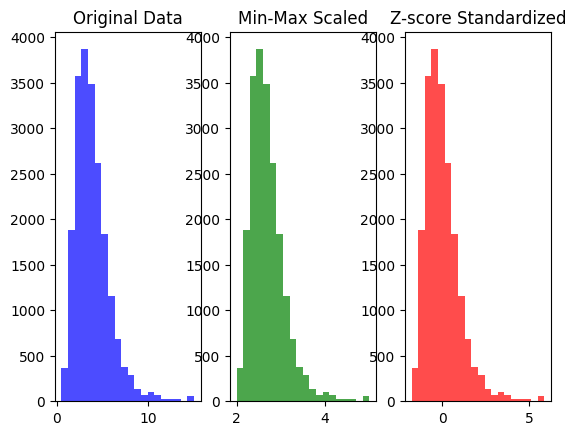

In [ ]:
# Original Distribution
plt.subplot(1, 3, 1)
plt.hist(data["MedInc"], bins=20, color='blue', alpha=0.7)
plt.title("Original Data")

# Min-Max Scaled
plt.subplot(1, 3, 2)
plt.hist(data["MedInc_minmax"], bins=20, color='green', alpha=0.7)
plt.title("Min-Max Scaled")

# Z-score Scaled
plt.subplot(1, 3, 3)
plt.hist(data["MedInc_zscore"], bins=20, color='red', alpha=0.7)
plt.title("Z-score Standardized")

## 🔹 Log Transformation
### 📖 Formula:
\[
X_scaled = \log(X + 1)
\]
- **(Adding 1 prevents issues with log(0))**

### ✅ When to Use:
✔ When data is **highly skewed**.  
✔ When working with **exponential growth data**, e.g., **financial data, population growth**.  
✔ When **reducing variance** and **improving normality** in features.

### ⚠ Considerations:
- Log transformation is **not suitable for negative values**.
- If data contains **zeros**, use **log(X + 1)** to avoid errors.

### 🛠 Python Implementation:
```python
import numpy as np

X_log = np.log1p(X)  # log(X + 1) to handle zeros


In [31]:
random_integers=np.random.randint(15,100,10)
random_integers

array([67, 29, 75, 79, 94, 99, 23, 98, 25, 24])

In [32]:
log_transformed_data = np.log1p(random_integers)
log_transformed_data

array([4.21950771, 3.40119738, 4.33073334, 4.38202663, 4.55387689,
       4.60517019, 3.17805383, 4.59511985, 3.25809654, 3.21887582])

# 🔹 Binning (Discretization) in Data Processing

## 📖 What is Binning?
Binning (also called **discretization**) is a **data preprocessing technique** where continuous numerical values are grouped into **discrete categories (bins)**. This helps in transforming numerical features into categorical features.

---

## 🛠 Why Use Binning?
✔ **Transforms continuous features** into categorical ones for models that work better with categories.  
✔ **Improves interpretability** by creating meaningful groupings (e.g., age groups: child, adult, senior).  
✔ **Reduces noise & variance**, making data more stable and less sensitive to small fluctuations.  

---

## 🔥 Example:
If we have a **"Salary"** column:

| Salary  | Binned Category |
|---------|----------------|
| 10,000  | Low  |
| 35,000  | Medium  |
| 75,000  | High  |

Here, salaries have been grouped into **Low, Medium, and High** categories.

---








Types of Binning

---


**1. Equal-Width Binning**
*   divides the data range into equiwidth intervals
*   Bin_Width= (MAXdata_pt-MINdata_pt)/Number of bins

**2. Equal-Frequency Binning **
*   Divides data into bins containing an equal number of observations.
*   Instead of fixed-width, bin boundaries are set based on quantiles (e.g., quartiles, percentiles).








In [ ]:
#equiwidth
## function to cal binwidth
def equal_width_binning(data, column, num_bins):
    min_val = data[column].min()
    max_val = data[column].max()
    return  (max_val - min_val) / num_bins
bin_width=equal_width_binning(data , 'HouseAge' , 6)
bin_width


8.5

In [ ]:
bin_label=[ 'Very Recent','Recent' , 'Medium' , 'Old' , 'Very Old' , 'Asthetic' ]
data['HouseAge_binned'] = pd.cut(data['HouseAge'], bins=6, labels=bin_label)
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore,MedInc_decimal,HouseAge_binned
0,8.3252,41.0,6.984127,3.619005,2.344766,0.083252,Very Old
1,8.3014,21.0,6.238137,3.614081,2.332238,0.083014,Medium
2,7.2574,52.0,8.288136,3.398084,1.782699,0.072574,Asthetic
3,5.6431,52.0,5.817352,3.064096,0.932968,0.056431,Asthetic
4,3.8462,52.0,6.281853,2.692328,-0.012881,0.038462,Asthetic


In [ ]:
#equidepth bining
data['HouseAge_equidepth'] = pd.qcut(data['HouseAge'], q=6, labels=bin_label)
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore,MedInc_decimal,HouseAge_binned,HouseAge_equidepth
0,8.3252,41.0,6.984127,3.619005,2.344766,0.083252,Very Old,Very Old
1,8.3014,21.0,6.238137,3.614081,2.332238,0.083014,Medium,Recent
2,7.2574,52.0,8.288136,3.398084,1.782699,0.072574,Asthetic,Asthetic
3,5.6431,52.0,5.817352,3.064096,0.932968,0.056431,Asthetic,Asthetic
4,3.8462,52.0,6.281853,2.692328,-0.012881,0.038462,Asthetic,Asthetic


### note that the result for row 1 is different because the first one divides using equal width of bins or bin size while the second one divides using equal frequencies or no of houses in each bin


# 🔹 Dimensionality Reduction

## 📖 What is Dimensionality Reduction?
Dimensionality reduction is the process of **reducing the number of features (or variables) in a dataset** while preserving as much relevant information as possible.  
More features can lead to **noise, redundancy, and reduced model interpretability**, making it harder to extract meaningful patterns.

---

## ✅ Why is Dimensionality Reduction Used?
✔ **Simplifies models**, making them easier to interpret.  
✔ **Reduces computation time**, improving efficiency.  
✔ **Prevents overfitting** by removing redundant and irrelevant features.  

---

## 🔥 Types of Dimensionality Reduction

### 1️⃣ Feature Selection
Selecting a **subset of the most important features** while discarding irrelevant or redundant ones.

**Methods:**
- **Filter Methods** → Based on statistical techniques like correlation.  
- **Wrapper Methods** → Iteratively selects the best feature combination (e.g., Recursive Feature Elimination).  
- **Embedded Methods** → Uses built-in model techniques (e.g., **Lasso Regression**).  

---

### 2️⃣ Feature Extraction
Transforming high-dimensional data into a **lower-dimensional space** while preserving structure.

**Common Techniques:**
- **Principal Component Analysis (PCA)**  
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
- **Autoencoders (Neural Networks for dimensionality reduction)**  

---








In [5]:
##Feature selection using Correlation
##lets get the california housing data
house=pd.DataFrame(fetch_california_housing().data , columns=fetch_california_housing().feature_names)
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


##Correlation
 it is a measure of how strongly the change in one feature affects other features . A positive correlation coefficient corresponds to a increase while negative in decrease

In [6]:
house.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

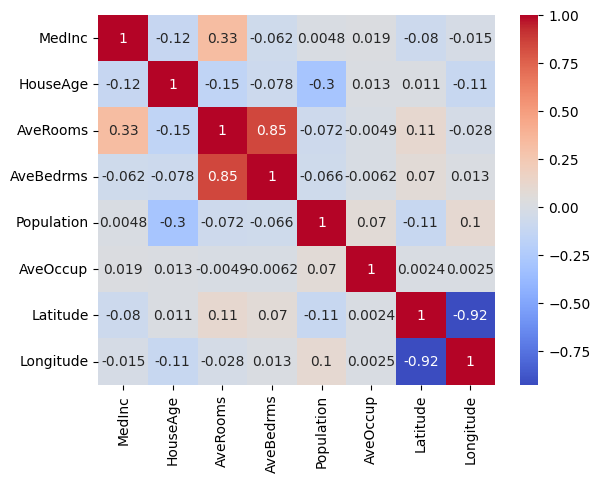

In [11]:
sns.heatmap(house.corr(),annot=True, cmap='coolwarm')
## a heatmap is a great way to visualize correlation between all features of the data
## as we can see since longitude and lattitude have alsmost zero affect on other variables  so  we can drop them
## also we see avg rooms and avg bedrooms are strongly correlated so we will choose only one of them ie avg rooms


In [14]:
house.drop(columns=['Latitude' , 'Longitude' , 'AveBedrms'] , axis=1 , inplace=True)

In [16]:
house.corr()

,MedInc,HouseAge,AveRooms,Population,AveOccup
MedInc,1.000000,-0.119034,0.326895,0.004834,0.018766
HouseAge,-0.119034,1.000000,-0.153277,-0.296244,0.013191
AveRooms,0.326895,-0.153277,1.000000,-0.072213,-0.004852
Population,0.004834,-0.296244,-0.072213,1.000000,0.069863
AveOccup,0.018766,0.013191,-0.004852,0.069863,1.000000


<Axes: >

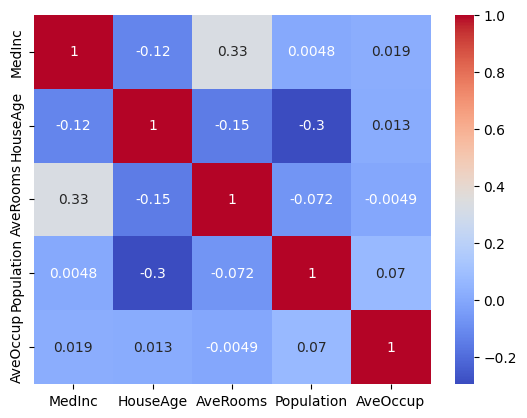

In [18]:
## ploting the heatmap again
sns.heatmap(house.corr(),annot=True, cmap='coolwarm')
# this way we can select more important features from data and train model on them

# 📌 Principal Component Analysis (PCA)

## ✨ What is PCA?
**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. It helps in:
- Reducing computational complexity.
- Removing redundant features.
- Enhancing data visualization.
- Avoiding the curse of dimensionality.

---

## 🔢 How PCA Works?
1. **Standardization** – Normalize the dataset to have zero mean and unit variance.
2. **Covariance Matrix Computation** – Measure how features vary together.
3. **Eigenvalue & Eigenvector Calculation** – Find the principal components.
4. **Sort & Select Components** – Rank components by explained variance and keep the top ones.
5. **Transform Data** – Project data onto the new feature space.

---

## 📊 PCA in Action
- Each principal component (PC) is a linear combination of the original features.
- PCs are **orthogonal** (uncorrelated).
- The first PC captures the most variance, followed by the second, and so on.

---

## 📈 Choosing the Right Number of Components
To decide how many PCs to keep, analyze the **explained variance ratio**:
- A **scree plot** shows the cumulative variance explained by each component.
- Keep enough components to retain **90-95% of the variance**.

---


In [20]:
from sklearn.decomposition import PCA
data1 = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:

# Apply PCA (keeping enough components to explain ~95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [25]:
# Print variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225 ]


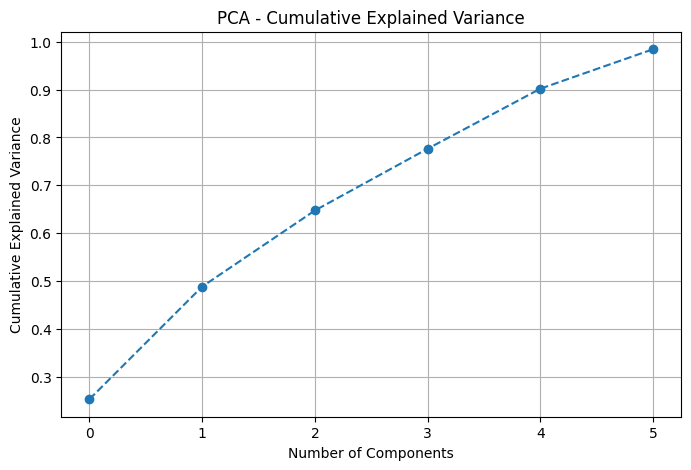

In [26]:
# Plot cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid()
plt.show()


In [27]:
print("Original Shape:", X.shape)
print("Transformed Shape:", X_pca.shape)

Original Shape: (20640, 8)
Transformed Shape: (20640, 6)
